In [27]:
import pandas as pd
import numpy as np
import arrow

In [28]:
# Traffic accidents go back to 2012

accidents = pd.read_csv("traffic_accidents.csv")
accidents["REPORTED_DATE"] = pd.to_datetime(accidents["REPORTED_DATE"])
accidents["FIRST_OCCURENCE_DATE"] = pd.to_datetime(accidents["FIRST_OCCURENCE_DATE"])

In [52]:
# Number of accidents per month.

months = accidents["FIRST_OCCURENCE_DATE"].dt.month
accidents["FIRST_OCCURENCE_DATE"].groupby(months, as_index=True).agg(["count"])

,count
FIRST_OCCURENCE_DATE,
1,11347
2,10468
3,10653
4,10906
5,11829
6,11737
7,10125
8,11972
9,12115


In [54]:
# Number of accidents per day of week. 0 = Sunday, 6 = Saturday.
# Notice there are a lot more accidents Mon - Thurs

dayofweek = accidents["FIRST_OCCURENCE_DATE"].dt.dayofweek
accidents["FIRST_OCCURENCE_DATE"].groupby(dayofweek).agg(["count"])

,count
FIRST_OCCURENCE_DATE,
0,18865
1,20212
2,21024
3,21322
4,22745
5,17242
6,14059


In [55]:
# Number of accidents by hour. Lots of accidents between 3-5PM

accidents["FIRST_OCCURENCE_DATE"].groupby(accidents["FIRST_OCCURENCE_DATE"].dt.hour).agg(["count"])

,count
FIRST_OCCURENCE_DATE,
0,2404
1,2385
2,2804
3,1174
4,879
5,1347
6,3523
7,7736
8,8156


In [56]:
# Type of accident counts. How are there so many hit and runs?

accidents["OFFENSE_CATEGORY_ID"].groupby(accidents["OFFENSE_CATEGORY_ID"]).agg(["count"])

,count
OFFENSE_CATEGORY_ID,
TRAF - ACCIDENT,91903
TRAF - ACCIDENT - DUI/DUID,4303
TRAF - ACCIDENT - FATAL,268
TRAF - ACCIDENT - HIT & RUN,35822
TRAF - ACCIDENT - POLICE,1310
TRAF - ACCIDENT - SBI,1863


In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map(df):
    plt.figure(figsize=(12, 8))
    denver_map = Basemap(
        width=50000,height=35000,
        resolution='l', projection='aea',
        lon_0=-104.991531, lat_0=39.742043
    )

    for index, d in df.iterrows():
        lon = d["GEO_LON"]
        lat = d["GEO_LAT"]
        x, y = denver_map(lon, lat)
        denver_map.plot(x, y, "wo", color="#ef1010", markersize=0.75, alpha=0.6)

    plt.show()


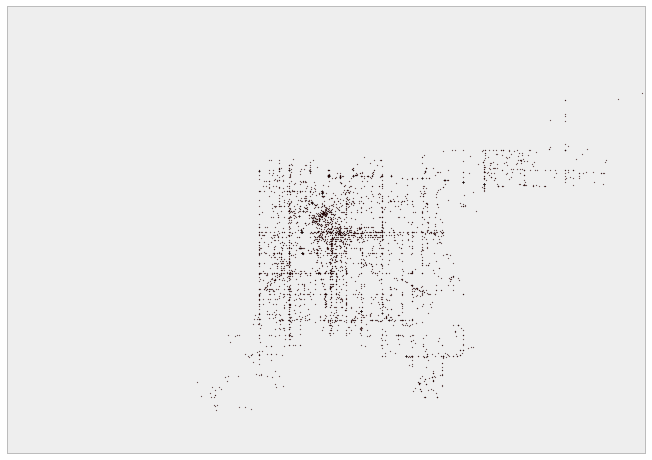

In [112]:
duis = accidents[accidents["OFFENSE_CATEGORY_ID"] == "TRAF - ACCIDENT - DUI/DUID    "]
draw_map(duis)

['TRAF - ACCIDENT - HIT & RUN   ' 'TRAF - ACCIDENT               '
 'TRAF - ACCIDENT - POLICE      ' 'TRAF - ACCIDENT - SBI         '
 'TRAF - ACCIDENT - DUI/DUID    ' 'TRAF - ACCIDENT - FATAL       ']


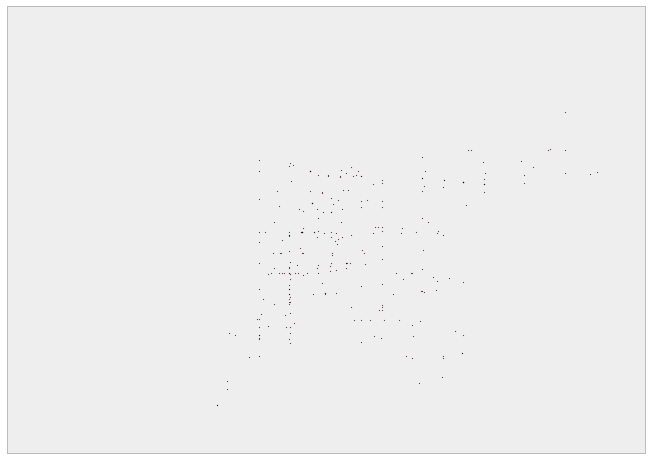

In [114]:
print(accidents["OFFENSE_CATEGORY_ID"].unique())
fatal_accidents = accidents[accidents["OFFENSE_CATEGORY_ID"] == "TRAF - ACCIDENT - FATAL       "]
draw_map(fatal_accidents)

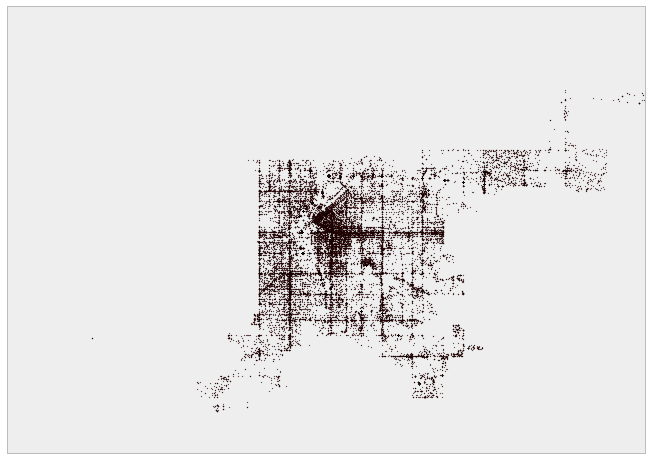

In [113]:
hr_accidents = accidents[accidents["OFFENSE_CATEGORY_ID"] == "TRAF - ACCIDENT - HIT & RUN   "]
draw_map(hr_accidents)